# Introduction

## What Is Natural Language Processing (NLP)?

Using computers to process (analyze, understand, generate) natural human languages.

## Why use NLP?

An enormous amount of information is stored as text. Computers can process this information much faster than humans.

## Higher-Level NLP Tasks

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

## Lower-Level Components

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Vectorizing:** Turning documents into vectors of numbers for use in machine learning
- **Machine learning:** specialized models that work well with text

## Why NLP is hard

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

## NLP terms

- **corpus** (plural **corpora**): a collection of documents (derived from the Latin word for "body")
- **document**: any item in a corpus (e.g. email, book chapter, tweet, article, or text message).

<a id='yelp_rev'></a>

# Reading in the Yelp Reviews

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import scipy as sp

from nltk.stem.snowball import SnowballStemmer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob, Word

%matplotlib inline

In [2]:
# Read yelp.csv into a DataFrame.
path = Path('..', 'assets', 'data', 'yelp.csv')
yelp = pd.read_csv(path)

In [3]:
# Simplify star rating prediction problem by making it binary, splitting between 3 and 4
# /scrub/
yelp.loc[:, 'positive_rating'] = yelp.loc[:, 'stars'].map({1:0, 2:0, 3:0, 4:1, 5:1})

In [4]:
# Define X and y.
# /scrub/
X = yelp.loc[:, 'text']
y = yelp.loc[:, 'positive_rating']

In [5]:
# Split the new DataFrame into training and testing sets.
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# The head of the data
# /scrub/
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,positive_rating
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1


<a id='text_class'></a>


# Introduction: Text Classification

**Text classification is the task of predicting which category or topic a text sample is from.**

E.g.:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?


**Turning text into feature vectors**

The only difference between this task and the kinds of classification tasks we have been considering is that our inputs consist of text rather than numeric features.

If we can find a way to represent text using a set of numeric features, then we can use standard machine learning classifiers for text classification.

We will start out with a **bag-of-words representation:**

- Preprocess the text, e.g. to remove punctuation and convert uppercase letters to lowercase.
- Create a vocabulary, e.g. every word in the corpus.
- Make each word in the vocabulary a feature.
- Represent each document with a vector that indicates how many times each word in the vocabulary appears in that document.

## Demo: Text Processing in scikit-learn

<a id='count_vec'></a>
### Creating Features Using CountVectorizer

- **What:** Converts each document into a set of words and their counts.
- **Why:** To use a machine learning model, we must convert unstructured text into numeric features.

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Model
![DTM](../assets/images/DTM.png)

**Notes on bag-of-words:**

- The phrases "term-document matrix" and "document-term matrix" are interchangeable.
- Vocabulary will often contain tens of thousands of words or more.
- Most features will have a value of zero for most documents, resulting in a sparse matrix of features.
- This approach is called "bag-of-words" because it loses the document's structure — as if the words are all jumbled up in a bag.
- Rather than counting occurrences of each word, you might just record a 1 or 0 to indicate whether it is present or divide by the length of the document to indicate the word's frequency.

In [7]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
# /scrub/
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [8]:
# Transformed feature matrices are stored as sparse matrices for efficiency.

# A sparse representation stores the vaues and locations of non-zero elements,
# rather than storing a number for every element, which saves space when
# most elements are zero.
# /scrub/
X_train_dtm

<7500x25797 sparse matrix of type '<class 'numpy.int64'>'
	with 622700 stored elements in Compressed Sparse Row format>

The "sparse matrix" data structure records which positions in the matrix have nonzero values and what those values are, as opposed to a "dense matrix" data structure that records the value at every position. The sparse matrix format is much more space-efficient when the matrix consists primarily of zeros, as a typical document-term matrix does.

In [9]:
# View as a dense matrix
# /scrub/
X_train_dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
# /scrub/
X_train_dtm.shape

(7500, 25797)

**Exercise (3 mins., post right away)**

- 7500 of what?

/scrub/

Documents

- 25797 of what?

/scrub/

Distinct words

- How would you interpret the output of `X_train_dtm.sum(axis='columns')`?

/scrub/

Words in each document

- How would you interpret the output of `X_train_dtm.sum(axis='index')`?

/scrub/

Occurrences of each word in the corpus

$\blacksquare$

In [11]:
# Last 50 features
# /scrub/
print((vect.get_feature_names()[-50:]))

['zillion', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'zippy', 'ziti', 'zoe', 'zoey', 'zoftik', 'zola', 'zombie', 'zombies', 'zone', 'zoned', 'zoners', 'zones', 'zoning', 'zoo', 'zoom', 'zoomed', 'zoos', 'zoyo', 'zpizza', 'zu', 'zucca', 'zucchini', 'zuccini', 'zuch', 'zuchinni', 'zuma', 'zumba', 'zupa', 'zur', 'zuzu', 'zuzus', 'zweigel', 'zwiebel', 'zy', 'zzed', 'zzzzzzzzzzzzzzzzz', 'école', 'òc']


In [12]:
# Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
#   'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
# /scrub/
vect.vocabulary_

{'having': 10754,
 'lived': 13443,
 'in': 11649,
 'chicago': 4401,
 'for': 9216,
 'most': 14935,
 'of': 15765,
 'my': 15116,
 'life': 13287,
 'was': 24893,
 'more': 14895,
 'than': 23005,
 'nervous': 15333,
 'what': 25080,
 'an': 1238,
 'arizona': 1577,
 'pizza': 17145,
 'experience': 8353,
 'would': 25428,
 'be': 2332,
 'like': 13321,
 'the': 23029,
 'part': 16507,
 'assumptions': 1741,
 'were': 25045,
 'correct': 5560,
 'but': 3578,
 'grimaldi': 10304,
 'is': 12168,
 'great': 10249,
 'we': 24966,
 'get': 9859,
 'margarita': 14013,
 'and': 1262,
 'it': 12187,
 'amazing': 1170,
 'normally': 15539,
 'deep': 6380,
 'dish': 6941,
 'person': 16848,
 'slowly': 20929,
 'winning': 25276,
 'me': 14258,
 'over': 16142,
 'thin': 23088,
 'crust': 5941,
 'also': 1124,
 'this': 23112,
 'place': 17163,
 'has': 10713,
 'cheesecake': 4346,
 'best': 2548,
 've': 24480,
 'ever': 8191,
 'had': 10527,
 'restaurant': 18998,
 'clean': 4740,
 'facility': 8488,
 'prices': 17715,
 'are': 1550,
 'super': 22303,

In [13]:
# Show vectorizer options.
# /scrub/
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

By default, CountVectorizer converts all text to lowercase before generating features. Otherwise, "Pizza" at the start of a sentence becomes a different feature from "pizza" in the middle of a sentence.

On the other hand, you would want different features corresponding to "Apple" the company and "apple" the fruit, so this step does discard some information.

In [14]:
# Don't convert to lowercase.
# /scrub/
vect = CountVectorizer(lowercase=False)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

**Exercise (1 min., post right away)**

- What is the vocabulary size for CountVectorizer on this dataset with `lowercase=False`? Is this size greater or smaller than the size with `lowercase=True`? Why?

In [15]:
## /scrub/
X_train_dtm.shape

(7500, 32420)

/scrub/

It is 32,420, whereas with `lowercase=True` it was 25,797. The vocabulary size is greater with `lowercase=False` because it treats words that are spelled the same but with different capitalization as distinct words, where setting `lowercase=True` causes them to be combined.

$\blacksquare$

In [16]:
# Create document-term matrices using default options for CountVectorizer.
# /scrub/
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [17]:
# Use Naive Bayes to predict the star rating.
# /scrub/
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [18]:
# Calculate accuracy.
# /scrub/
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8212


In [19]:
# Check label balance
# /scrub/
y_test.value_counts()

1    1716
0     784
Name: positive_rating, dtype: int64

In [20]:
# first create an array with the same shape as y
# then fill it in with the most common value -- numpy "broadcasts" the sum over the whole array
# /scrub/
most_common_value = y_train.value_counts().idxmax()
null_pred = np.zeros(y_test.shape) + most_common_value
null_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [21]:
# then compare predicting the mean every time to the true values
# /scrub/
null_accuracy = metrics.accuracy_score(null_pred, y_test)
null_accuracy

0.6864

Our estimator predicted with ~82% accuracy, which is an improvement over this baseline 69% accuracy (always predicting a positive rating).

Let's look more into how the vectorizer works.

In [22]:
# Define a function that accepts a vectorizer and calculates the accuracy.
# /scrub/
def vectorizer_test(vect):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [23]:
# min_df=2 says to ignore words that occur less than twice ('df' means "document frequency").
# /scrub/
vect = CountVectorizer(min_df=2, max_features=10000)
vectorizer_test(vect)

('Features: ', 10000)
('Accuracy: ', 0.8172)


Let's take a look next at other ways of preprocessing text!

<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [24]:
# Include 1-grams and 2-grams.
# /scrub/
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
vectorizer_test(vect)

('Features: ', 339112)
('Accuracy: ', 0.792)


As $n$ gets larger, the number of *unique* n-grams increases greatly, adding pure noise to the data set.

In [25]:
# Last 50 features
# /scrub/
print((vect.get_feature_names()[-50:]))

['zucchini the', 'zucchini veal', 'zucchini very', 'zucchini was', 'zucchini we', 'zucchini with', 'zuccini', 'zuccini italian', 'zuccini so', 'zuch', 'zuch and', 'zuchinni', 'zuchinni peppers', 'zuchinni the', 'zuchinni wtf', 'zuma', 'zuma and', 'zuma because', 'zuma roka', 'zuma since', 'zumba', 'zumba class', 'zumba or', 'zumba the', 'zumba yoga', 'zupa', 'zupa flavors', 'zur', 'zur kate', 'zuzu', 'zuzu has', 'zuzu in', 'zuzu is', 'zuzu the', 'zuzu was', 'zuzus', 'zuzus room', 'zweigel', 'zweigel wine', 'zwiebel', 'zwiebel kräuter', 'zy', 'zy world', 'zzed', 'zzed in', 'zzzzzzzzzzzzzzzzz', 'école', 'école lenôtre', 'òc', 'òc châm']


<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

In [26]:
# Show vectorizer options.
# /scrub/
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [27]:
# CountVectorizer stop words for English
# /scrub/
vect = CountVectorizer(stop_words='english')
print((vect.get_stop_words()))

frozenset({'how', 'find', 'everything', 'couldnt', 'wherever', 'which', 'perhaps', 'should', 'forty', 'very', 'ever', 'over', 'thereby', 'whether', 'all', 'me', 'nobody', 'has', 'myself', 'serious', 'see', 'that', 'were', 'thus', 'whole', 'beyond', 'into', 'sincere', 'she', 'herein', 'sometimes', 'more', 'would', 'be', 'describe', 'front', 'often', 'to', 'because', 'cry', 'someone', 'enough', 'anyway', 'latter', 'due', 'before', 'sixty', 'at', 'formerly', 'beside', 'towards', 'last', 'here', 'each', 'an', 'from', 'again', 'too', 'whatever', 'until', 'further', 'no', 'toward', 'inc', 'ours', 'thin', 'may', 'via', 'whoever', 'anyone', 'being', 'other', 'mostly', 'mine', 'show', 'elsewhere', 'its', 'least', 'below', 'always', 'by', 'moreover', 'go', 'within', 'still', 'anywhere', 'their', 'interest', 're', 'meanwhile', 'for', 'first', 'he', 'wherein', 'hundred', 'eight', 'system', 'one', 'have', 'six', 'becomes', 'yet', 'off', 'without', 'will', 'they', 'latterly', 'might', 'bill', 'hereb

<a id='cvec_opt'></a>
### Other CountVectorizer Options

- `max_features`: int or None, default=None
- If not None, build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus. This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [28]:
# Remove English stop words and only keep 100 features.
# /scrub/
vect = CountVectorizer(stop_words='english', max_features=100)
vectorizer_test(vect)

('Features: ', 100)
('Accuracy: ', 0.7452)


In [29]:
# All 100 features
# /scrub/
print((vect.get_feature_names()))

['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'beer', 'best', 'better', 'big', 'bit', 'bread', 'burger', 'came', 'cheese', 'chicken', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'drink', 'drinks', 'eat', 'experience', 'favorite', 'feel', 'food', 'fresh', 'friendly', 'fries', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'phoenix', 'pizza', 'place', 'pretty', 'price', 'prices', 'really', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'small', 'staff', 'stars', 'sure', 'sweet', 'table', 'tasty', 'thing', 'things', 'think', 'time', 'times', 'try', 've', 'wait', 'want', 'wasn', 'way', 'went', 'wine', 'worth']


Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In our case, using about 26,000 unigram features rather than 339,112 bigram features gave us a much smaller, simpler, and easier-to-think-about model and also resulted in higher accuracy. Our model and our dataset size were not sufficient to pick out the signal within the noise that the bigrams added.

In [30]:
# Include 1-grams and 2-grams, and limit the number of features.
# /scrub/

print('1-grams and 2-grams, up to 10K features:')
vect = CountVectorizer(ngram_range=(1, 2), max_features=10000)
vectorizer_test(vect)

print()
print('1-grams only, up to 10K features:')
vect = CountVectorizer(ngram_range=(1, 1), max_features=10000)
vectorizer_test(vect)

1-grams and 2-grams, up to 10K features:
('Features: ', 10000)
('Accuracy: ', 0.8316)

1-grams only, up to 10K features:
('Features: ', 10000)
('Accuracy: ', 0.818)


In [31]:
# Include 1-grams and 2-grams, and only include terms that appear at least two times.
# /scrub/
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
vectorizer_test(vect)

('Features: ', 95504)
('Accuracy: ', 0.8388)


Adding bigrams does improve performance modestly if we prune down the set of features that we use.

**Exercise (2 mins., post right away)**

How does each of the following changes to the feature representation used affect the bias and variance of a resulting model?

- Increasing min_df

/scrub/

Increases bias, decreases variance

- Using both unigrams and bigrams instead of just unigrams.

/scrub/

Decreases bias, increases variance.

- Removing stop words

/scrub/

Maybe increases bias very slightly, decreases variance.

- Decreasing `max_features`

/scrub/

Increases bias, decreases variance.

$\blacksquare$

<a id='textblob'></a>
## Introduction to TextBlob

You should already have downloaded TextBlob, a Python library used to explore common NLP tasks. If you haven’t, please return to [this step](#textblob_install) for instructions on how to do so. We’ll be using this to organize our corpus for analysis.

As mentioned earlier, you can read more on the [TextBlob website](https://textblob.readthedocs.io/en/dev/).

In [32]:
# Print the first review.
# /scrub/
print((yelp.text[0]))

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [33]:
# Save it as a TextBlob object.
# /scrub/
review = TextBlob(yelp.text[0])

In [34]:
# List the words.
# /scrub/
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [35]:
# List the sentences.
# /scrub/
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [36]:
# Some string methods are available.
# /scrub/
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

<a id='stem'></a>
## Stemming and Lemmatization
Interesting read: [Stemming and Lemmatization by Stanford NLP Lab](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

Stemming is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed".

- **What:** Reduce a word to its base/stem/root form.
- **Why:** This intelligently reduces the number of features by grouping together (hopefully) related words.
- **Notes:**
    - Stemming uses a simple and fast rule-based approach.
    - Stemmed words are usually not shown to users (used for analysis/indexing).
    - Some search engines treat words with the same stem as synonyms.

[Snowball stemming algorithm (a.k.a. Porter2)](http://snowball.tartarus.org/algorithms/english/stemmer.html) is  an improved version of the original [Porter's stemming algorithm](http://www.cs.odu.edu/~jbollen/IR04/readings/readings5.pdf) by Martin Porter

In [37]:
# Initialize stemmer.
# /scrub/
stemmer = SnowballStemmer('english')

In [38]:
# Stem each word.
# /scrub/
print([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

Some examples you can see are "excellent" stemmed to "excel" and "amazing" stemmed to "amaz".

Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word.  

This is useful for words that do not share an obvious root such as "better" and "best".

- **What:** Lemmatization derives the canonical form ("lemma") of a word.
- **Why:** It can be better than stemming.
- **Notes:** Uses a dictionary-based approach (slower than stemming).

In [39]:
# Lemmatize assume every word is a verb.
# /scrub/
print([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

Some examples you can see are "was" lemmatized to "be" and "arrived" lemmatized to "arrive".

Without `post='v'`, the `lemmatize` method used here assumes that each word is a noun, and it does not do much.

**More Lemmatization and Stemming Examples**

|Word|Lemmatization|Stemming|
|-----|-------------|---------|
|shouted|shout|shout|
|best | good|best|
|better | good|better|
|good | good|good|
|hidden | hide|hidden|
|computing |compute| comput|
|computed |compute| comput|
|wipes |wipe| wip|
|wiped |wipe| wip|
|wiping |wipe| wip|

In [40]:
# Define a function that accepts text and returns a list of lemmas.
# /scrub/
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [41]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
# /scrub/
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
vectorizer_test(vect)

('Features: ', 26735)
('Accuracy: ', 0.8168)


In [42]:
# Last 50 features
# /scrub/
print((vect.get_feature_names()[-50:]))

['zillion', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zip-loc', 'zipcar', 'zipper', 'zipps', 'zippy', 'ziti', 'zoe', 'zoey', 'zoftik', 'zombie', 'zombie-like', 'zone', 'zoned', 'zoners', 'zoning', 'zoo', 'zoom', 'zoomed', 'zoyo', 'zpizza', 'zucca', 'zucchini', 'zucchini/mushroom', 'zuccini', 'zuch', 'zuchinni', 'zuma', 'zuma-roka', 'zumba', 'zupa', 'zur', 'zuzu', 'zuzus', 'zweigel', 'zwiebel-kräuter', 'zzed', 'zzzzzzzzzzzzzzzzz', '¡cash', '¡excellent', '¡muy', 'école', 'òc']


Keep in mind that you should constantly be thinking about the result of each preprocessing step instead of blindly trying them without thinking. Does each type of preprocessing "makes sense" with the input data you are using? Is it likely to keep intact the signal and remove noise?

<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [43]:
# Example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [44]:
# Term frequency
vect = CountVectorizer()
vect.fit(simple_train)
tf = pd.DataFrame(vect.transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [45]:
# Document frequency
vect = CountVectorizer(binary=True)
vect.fit(simple_train)
df = vect.transform(simple_train).toarray().sum(axis=0) # can't use axis='index' in NumPy
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [46]:
# Term frequency–inverse document frequency (simple version)
# /scrub/
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1, while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [47]:
# TfidfVectorizer -- uses a slightly different implementation of the same basic idea
# /scrub/
vect = TfidfVectorizer()
vect.fit(simple_train)
pd.DataFrame(vect.transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


[Details of the sklearn implementation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) -- the idf term has a log and some smoothing, and each row is normalized to have unit length.

In [48]:
# Try it on our data
# /scrub/
vect = TfidfVectorizer(min_df=10, stop_words='english')
vectorizer_test(vect)

('Features: ', 4542)
('Accuracy: ', 0.774)


<a id='yelp_tfidf'></a>
## Using TF–IDF to Summarize a Yelp Review

TF-IDF tries to pick out the most distinctive words in a given document relative to the overall corpus. Thus, we would expect that using the words with the highest TF-IDF scores for a given document would give us a better sense of what that document is about than using an equal number of random words from that document. Let's give this idea a try.

In [49]:
# Create a document-term matrix using TF–IDF.
# /scrub/
vect = TfidfVectorizer(stop_words='english')

In [50]:
# Fit transform Yelp data.
# /scrub/
vect.fit(yelp.text)
dtm = vect.transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [51]:
def summarize():
    
    # Choose a random review that is at least 300 characters.
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words.
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review.
    print(('\n' + review_text))

In [52]:
summarize()

TOP SCORING WORDS:
simply
facilities
golf
spa
resort

RANDOM WORDS:
happen
20
valley
little
experience

My wife and I decided to take a little vaca to celebrate our 13th anniversary and also was the first time that we were traveling with our 5-month old, so you can imagine we were a little apprehensive. 

The resort is absolutely top-notch, the rooms are very spacious, the staff is very courteous, and the facilities are simply superb.  Our room overlooked the mountain, and in the morning, it was blissful to sit outside and sip on our cups of joe. 

The rooms have a microwave and a small fridge, something that was invaluable to us to store milk and warm it up for our little one.  The spa is simply one of the best in the valley, and even if you don't stay here, I would recommend the spa to anyone.  The resort is close to at least 20 golf courses, something that might be important to other golf nuts like me. 

So then why not 5 stars? Simply because they would not extend the check-out tim

<a id='sentiment'></a>
## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 

In [53]:
print(review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [54]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
# /scrub/
review.sentiment.polarity

0.40246913580246907

In [55]:
# Define a function that accepts text and returns the polarity.
# /scrub/
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [56]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
# /scrub/
yelp.loc[:, 'sentiment'] = yelp.loc[:, 'text'].apply(detect_sentiment)

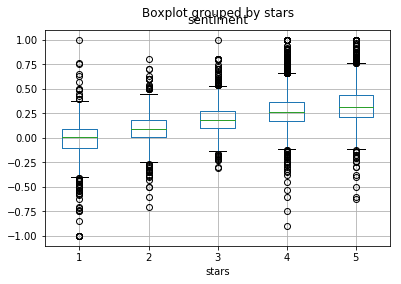

In [57]:
# Box plot of sentiment grouped by stars
# /scrub/
yelp.boxplot(column='sentiment', by='stars')

In [58]:
# Reviews with most positive sentiment
# /scrub/
yelp.loc[yelp.loc[:, 'sentiment'] == 1, 'text'].head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [59]:
# Reviews with most negative sentiment
# /scrub/
yelp.loc[yelp.loc[:, 'sentiment'] == -1, 'text']

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
9924                                    Horrible service.
Name: text, dtype: object

In [60]:
# Negative sentiment in a 5-star review
# /scrub/
yelp.loc[(yelp.loc[:, 'stars'] == 5) & (yelp.loc[:, 'sentiment'] < -0.3), 'text']

390     RIP AZ Coffee Connection.  :(  I stopped by tw...
1287    Obsessed. Like, I've-got-the-Twangy-Tart-withd...
3075                       Unfortunately Out of Business.
3516    Cashew brittle, almond brittle, bacon brittle!...
6726    Brown bag chicken sammich, mac n cheese, fried...
9809    I have to tell you....\n\nI had their Jerk Chi...
Name: text, dtype: object

In [61]:
# Positive sentiment in a 1-star review
# /scrub/
yelp.loc[(yelp.loc[:, 'stars'] == 1) & (yelp.loc[:, 'sentiment'] > 0.7), 'text']

1781    If you like the stuck up Scottsdale vibe this ...
6222    My mother always told me, if I didn't have any...
8833    The owner has changed hands & this place isn't...
Name: text, dtype: object

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [62]:
# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp.loc[:, feature_cols]
y = yelp.loc[:, 'positive_rating']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
vect.fit(X_train.text)
X_train_dtm = vect.transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(7500, 25797)
(2500, 25797)


In [64]:
# Shape of other four feature columns
X_train.drop('text', axis='columns').shape

(7500, 4)

In [65]:
# Cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('text', axis='columns').astype(float))
extra.shape

(7500, 4)

In [66]:
# Combine sparse matrices.
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(7500, 25801)

In [67]:
# Repeat for testing set.
extra = sp.sparse.csr_matrix(X_test.drop('text', axis='columns').astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(2500, 25801)

In [68]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7976


In [69]:
# Use logistic regression with all features.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8016


<a id='more_textblob'></a>
## Bonus: Fun TextBlob Features

In [75]:
# For some reason this code does not work the first time I try to run it.
# Spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [72]:
# Spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [73]:
# Definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [74]:
# Language identification
TextBlob('Hola amigos').detect_language()

'es'

<a id="bayes"></a>

## Appendix: Intro to Naive Bayes and Text Classification

Naive Bayes is a very popular classifier because it has minimal storage requirements, is fast, can be tuned easily with more data, and has found very useful applications in text classificaton. Paul Graham originally proposed using Naive Bayes to detect spam in his [Plan for Spam](http://www.paulgraham.com/spam.html).

Earlier we experimented with text classification using a Naive Bayes model. What exactly are Naive Bayes classifiers? 

**What is Bayes?**  
Bayes, or Bayes' Theorem, is a way to update a probability distribution given some new data.

Below is the equation for Bayes.  

$$P(A \ | \ B) = \frac {P(B \ | \ A) \times P(A)} {P(B)}$$

- **$P(A \ | \ B)$** : Probability of `Event A` occurring given `Event B` has occurred.
- **$P(B \ | \ A)$** : Probability of `Event B` occurring given `Event A` has occurred.
- **$P(A)$** : Probability of `Event A` occurring.
- **$P(B)$** : Probability of `Event B` occurring.



## Applying Naive Bayes Classification to Spam Filtering

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam.** ("Ham" just means not spam. It can include emails that look like spam but that you opt into!)

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are conditionally independent, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

Note that each conditional probability in the numerator is easily calculated directly from the training data!

So, we can calculate all of the values in the numerator by examining a corpus of spam email:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We would repeat this process with a corpus of ham email:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the higher probability, and so we predict that the email is spam.


### Key Takeaways

- The "naive" assumption of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple.
- The normalization constant (the denominator) can be ignored since it's the same for all classes.
- The prior probability is much less relevant once you have a lot of features.

### Comparing Naive Bayes With Other Models

Advantages of Naive Bayes:

- Model training and prediction are very fast.
- It's somewhat interpretable.
- No tuning is required.
- Features don't need scaling.
- It's insensitive to irrelevant features (with enough observations).
- It performs better than logistic regression when the training set is very small.

Disadvantages of Naive Bayes:

- If "spam" is dependent on non-independent combinations of individual words, it may not work well.
- Predicted probabilities are not well calibrated.
- Correlated features can be problematic (due to the independence assumption).
- It can't handle negative features (with Multinomial Naive Bayes).
- It has a higher "asymptotic error" than logistic regression.

-----

<a id='conclusion'></a>
## Summary

- NLP techniques allow us to do machine learning with text.
- High-level NLP tasks include part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
- Common steps for preprocessing text include splitting into words ("tokenizing"), discarding punctuation, converting to lowercase, and stemming/lemmatizing.
- To apply machine learning to text, we need to convert documents into numeric vectors.
- Bag-of-words representations ignore word order, while ngram representations preserve it to some extent.
- TF-IDF is a powerful technique for turning the words in a document into a useful feature vector.